In [1]:
#importing necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [2]:
#importing algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [3]:
#Reading Dataset
db=pd.read_csv("diabetes_dataset.csv")

In [4]:
#Shape of the dataset
db.shape

(768, 9)

In [5]:
#Total size of the dataset
db.size

6912

In [6]:
#The first five dataset entities
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Information about Features
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Generating descriptive statistics of the dataset
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Count of positive and negative cases present in dataset
db.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 -> Not Diabetic

1 -> Diabetic

In [10]:
#The distribution of the Outcome variable was examined.
db["Outcome"].value_counts()*100/len(db)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [11]:
#Checking for missing values
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing value(NaN) present in the data set

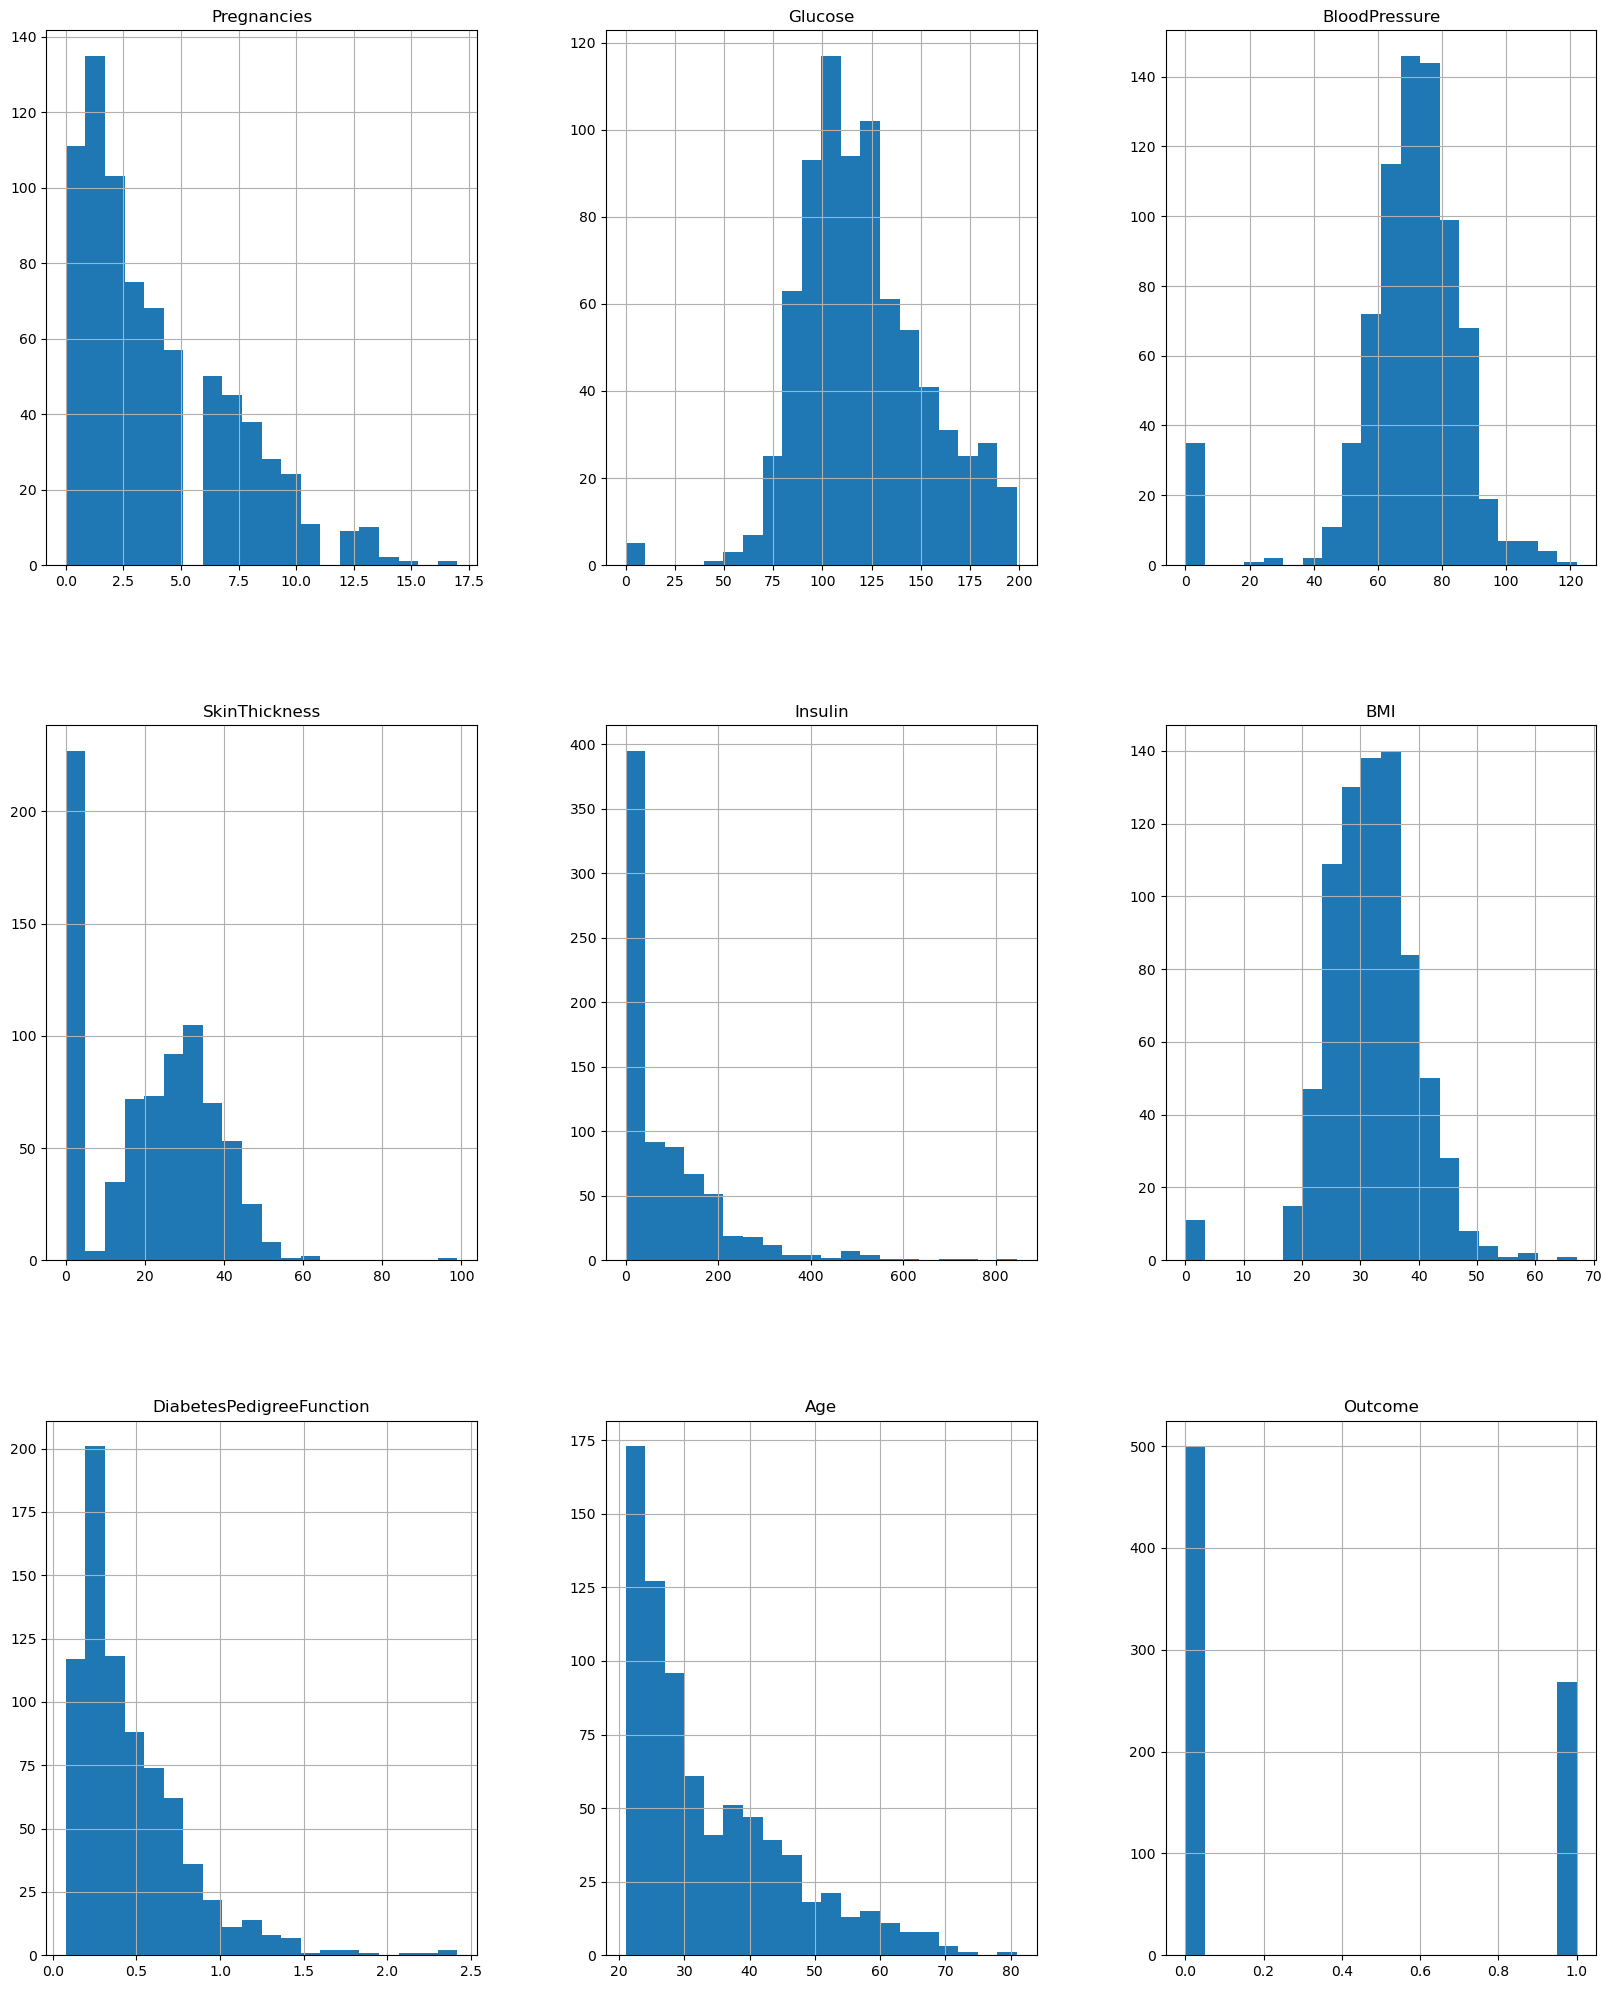

In [12]:
db.hist(bins=20, figsize=(20,25))
plt.show()

**Visualizing the Data to Gain Insights**

In [13]:
db.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [14]:
db.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [15]:
db.groupby("Outcome").agg({"Glucose":"mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [16]:
db.groupby("Outcome").agg({"Insulin":"mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [17]:
db.groupby("Outcome").agg({"SkinThickness":"mean"})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


In [18]:
db.groupby("Outcome").agg({"BMI":"mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [19]:
#Checking for Correlation
db.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


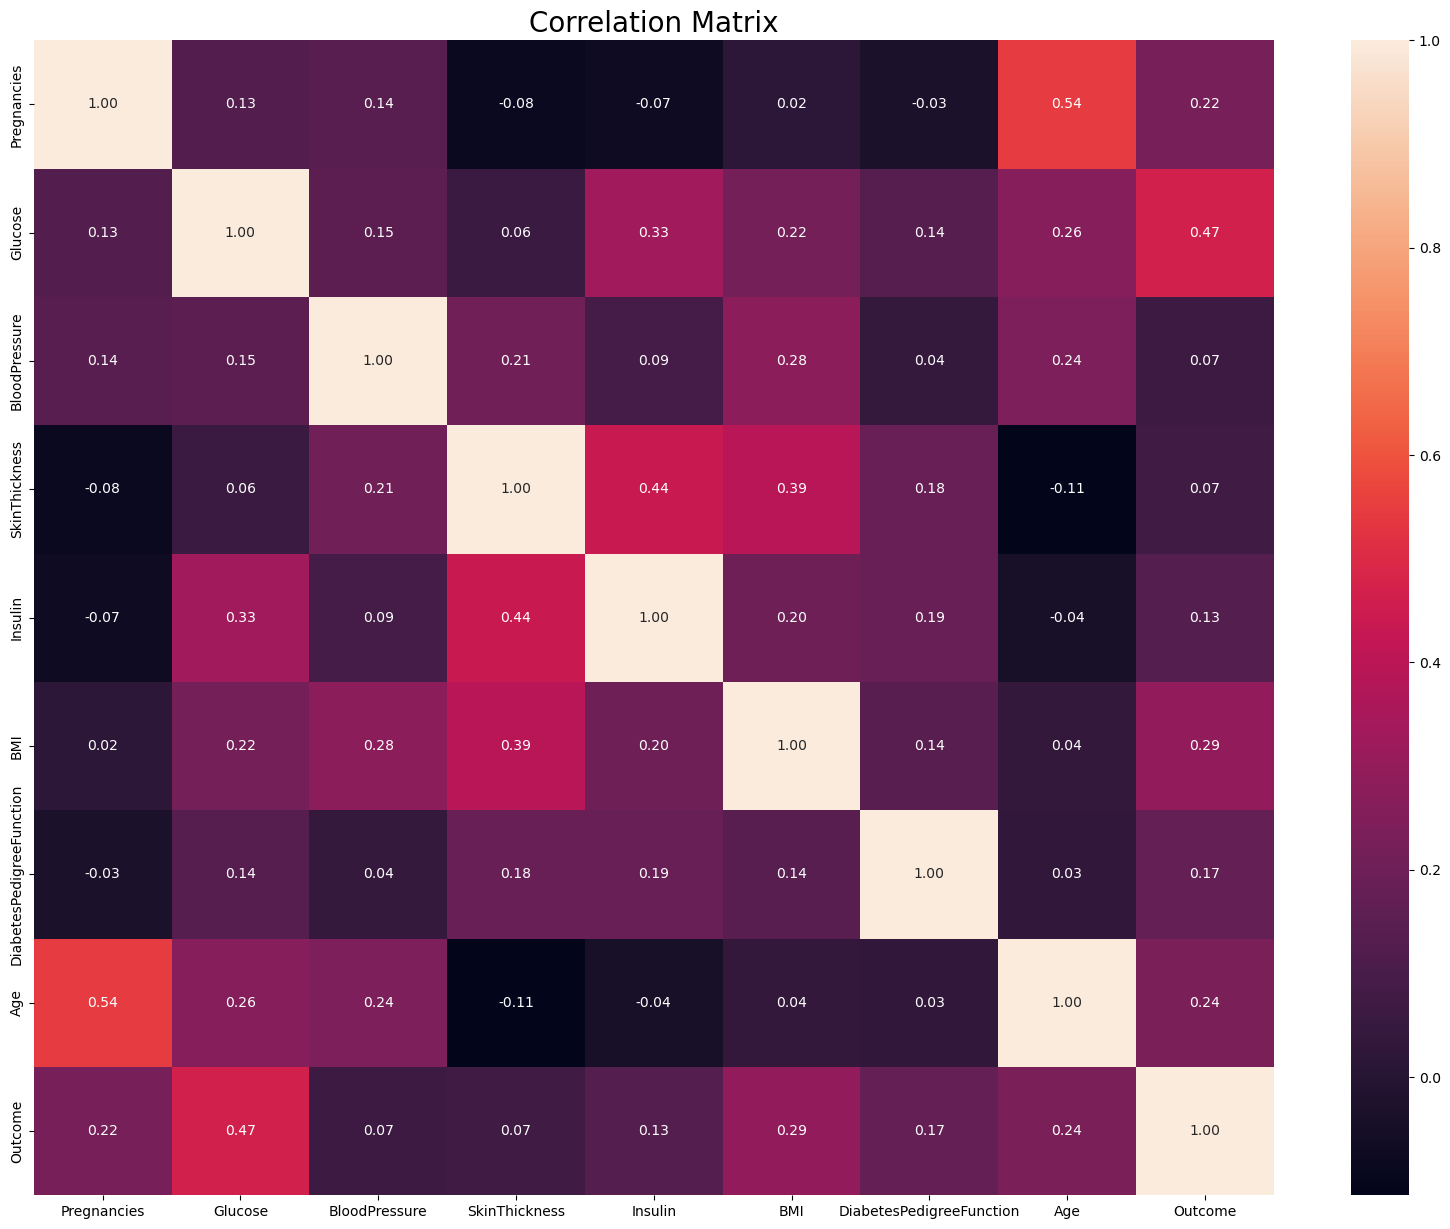

In [20]:
#Correlation matrix heatmap of the dataset
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(db.corr(), annot=True, fmt=".2f", ax=ax )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Data Preprocessing



In dataset if we observe some parameters/features have value 0 which is not possible, that is feature values equal to 0 means missing value.

In [21]:
#These features can't be 0, So replacing their 0 value by NaN
db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [22]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [23]:
#Now again checking for missing values
db.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy="median")

# imputer = imputer.fit(diab)
# diab = imputer.transform(diab)

In [25]:
def mean_target(var):   
    result = db[db[var].notnull()]
    result = result[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    return result

In [26]:
columns = db.columns
columns = columns.drop("Outcome")
for column in columns:
    mean_target(column)
    db.loc[(db['Outcome'] == 0 ) & (db[column].isnull()), column] = mean_target(column)[column][0]
    db.loc[(db['Outcome'] == 1 ) & (db[column].isnull()), column] = mean_target(column)[column][1]

In [27]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0
2,8.0,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.000000,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,130.287879,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.000000,26.2,0.245,30.0,0
766,1.0,126.0,60.0,33.0,206.846154,30.1,0.349,47.0,1


In [28]:
db['Insulin'] = db['Insulin'].round(2)
db.head()
#during mean not appropriate for insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,206.85,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,130.29,26.6,0.351,31.0,0
2,8.0,183.0,64.0,33.0,206.85,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.00,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.00,43.1,2.288,33.0,1


In [29]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now, No missing value is present in the dataset

# Feature Engineering

Adding a new column based on BMI

In [30]:
BMI_cat = pd.Series(["Underweight", "Normal", "Overweight", "Obesity"], dtype = "category")
db["BMI_cat"] = BMI_cat

db.loc[db["BMI"] < 18.5, "BMI_cat"] = BMI_cat[0]
db.loc[(db["BMI"] > 18.5) & (db["BMI"] < 24.9), "BMI_cat"] = BMI_cat[1]
db.loc[(db["BMI"] > 24.9) & (db["BMI"] < 34.9), "BMI_cat"] = BMI_cat[2]
db.loc[db["BMI"] > 34.9, "BMI_cat"] = BMI_cat[3]

In [31]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat
0,6.0,148.0,72.0,35.0,206.85,33.6,0.627,50.0,1,Overweight
1,1.0,85.0,66.0,29.0,130.29,26.6,0.351,31.0,0,Overweight
2,8.0,183.0,64.0,33.0,206.85,23.3,0.672,32.0,1,Normal
3,1.0,89.0,66.0,23.0,94.00,28.1,0.167,21.0,0,Overweight
4,0.0,137.0,40.0,35.0,168.00,43.1,2.288,33.0,1,Obesity


In [32]:
# BP_level = pd.Series(["Normal", "High"], dtype = "category")
# db["BP_level"] = BP_level

# db.loc[db["BloodPressure"] <= 89, "BP_level"] = BP_level[0]
# db.loc[db["BloodPressure"] > 89, "BP_level"] = BP_level[1]

In [33]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat
0,6.0,148.0,72.0,35.0,206.85,33.6,0.627,50.0,1,Overweight
1,1.0,85.0,66.0,29.0,130.29,26.6,0.351,31.0,0,Overweight
2,8.0,183.0,64.0,33.0,206.85,23.3,0.672,32.0,1,Normal
3,1.0,89.0,66.0,23.0,94.00,28.1,0.167,21.0,0,Overweight
4,0.0,137.0,40.0,35.0,168.00,43.1,2.288,33.0,1,Obesity


# One-Hot Encoding of text features

In [34]:
label_encoder = LabelEncoder()
label1 = label_encoder.fit_transform(db.BMI_cat)
# label2 = label_encoder.fit_transform(db.BP_level)
db["BMI_cat"] = label1
# db["BP_level"] = label2

In [35]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat
0,6.0,148.0,72.0,35.0,206.85,33.6,0.627,50.0,1,2
1,1.0,85.0,66.0,29.0,130.29,26.6,0.351,31.0,0,2
2,8.0,183.0,64.0,33.0,206.85,23.3,0.672,32.0,1,0
3,1.0,89.0,66.0,23.0,94.00,28.1,0.167,21.0,0,2
4,0.0,137.0,40.0,35.0,168.00,43.1,2.288,33.0,1,1


In [36]:
#seperating features and target
X = db.drop(columns='Outcome',axis=1)
y= db['Outcome']

In [37]:
#Standardizing
print(X.std())

Pregnancies                  3.369578
Glucose                     30.462008
BloodPressure               12.106044
SkinThickness                8.923908
Insulin                     88.861106
BMI                          6.878970
DiabetesPedigreeFunction     0.331329
Age                         11.760232
BMI_cat                      0.758047
dtype: float64


In [38]:
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

print(X)

[[ 0.63994726  0.86401998 -0.03538894 ...  0.46849198  1.4259954
   0.74595997]
 [-0.84488505 -1.20547775 -0.53133213 ... -0.36506078 -0.19067191
   0.74595997]
 [ 1.23388019  2.01374094 -0.69664653 ...  0.60439732 -0.10558415
  -1.89411956]
 ...
 [ 0.3429808  -0.02290762 -0.03538894 ... -0.68519336 -0.27575966
   0.74595997]
 [-0.84488505  0.14133823 -1.02727533 ... -0.37110101  1.17073215
   0.74595997]
 [-0.84488505 -0.94268439 -0.20070334 ... -0.47378505 -0.87137393
   0.74595997]]


In [39]:
print(X.std())

1.0


In [40]:
X = np.asarray(X)
y = np.asarray(y)

In [41]:
models = [LogisticRegression(max_iter=1000,random_state=12),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=12)]

In [42]:
def compare_model_cv():
    for model in models:
        cv_score=cross_val_score(model,X,y,cv=5)
        mean_accuracy=sum(cv_score)/len(cv_score)
        mean_accuracy=mean_accuracy*100
        
        print('CV accuracy for ',model,'=',cv_score)
        print('Accuracy of ',model,'=',mean_accuracy)
        print('------------------------------')

In [43]:
compare_model_cv()

CV accuracy for  LogisticRegression(max_iter=1000, random_state=12) = [0.78571429 0.75974026 0.81818182 0.82352941 0.77777778]
Accuracy of  LogisticRegression(max_iter=1000, random_state=12) = 79.29887106357695
------------------------------
CV accuracy for  SVC(kernel='linear') = [0.81168831 0.83766234 0.82467532 0.8627451  0.80392157]
Accuracy of  SVC(kernel='linear') = 82.81385281385282
------------------------------
CV accuracy for  KNeighborsClassifier() = [0.7987013  0.83766234 0.80519481 0.83660131 0.82352941]
Accuracy of  KNeighborsClassifier() = 82.0337832102538
------------------------------


C:\Users\vatsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vatsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

CV accuracy for  RandomForestClassifier(random_state=12) = [0.88311688 0.87012987 0.88311688 0.89542484 0.87581699]
Accuracy of  RandomForestClassifier(random_state=12) = 88.15210932857991
------------------------------


In [44]:
#creating a dictionary of hyperparameters

model_hyperparameters = {
    'log_reg_hyperparameters': {
        'C': [1,5,10,20]
    },
    
    'svc_hyperparameters': {
        'kernel': ['linear','poly','rbf','sigmoid'],
        'C': [1,5,10,20]
    },
    'KNN_hyperparameters':{
        'n_neighbors': [3,5,10],
        'leaf_size': [25,35,40]
    },
    
    'random_forest_hyperparameters': {
        'n_estimators': [10,20,50,100],
        "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]
    }
}

In [45]:
model_keys=list(model_hyperparameters.keys())

In [46]:
def ModelSelection(list_of_models, hyperparametrs_dictionary):
    
    result=[]
    i=0
    
    for model in list_of_models:
        key=model_keys[i]
        params=hyperparametrs_dictionary[key]
        i+=1
        
        print(model)
        print(params)
        
        classifier = GridSearchCV(model,params,cv=5)
        
        classifier.fit(X,y)
        
        result.append({
            'model used':model,
            'highest score': classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })
        
    result_dataframe = pd.DataFrame(result, columns=['model used','highest score','best hyperparameters'])
        
    return result_dataframe

In [47]:
ModelSelection(models, model_hyperparameters)

LogisticRegression(max_iter=1000, random_state=12)
{'C': [1, 5, 10, 20]}
SVC(kernel='linear')
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10], 'leaf_size': [25, 35, 40]}


C:\Users\vatsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vatsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

RandomForestClassifier(random_state=12)
{'n_estimators': [10, 20, 50, 100], 'max_features': [3, 5, 7], 'min_samples_split': [2, 5, 10, 30], 'max_depth': [3, 5, 8, None]}


,model used,highest score,best hyperparameters
0,"LogisticRegression(max_iter=1000, random_state...",0.794287,{'C': 5}
1,SVC(kernel='linear'),0.842484,"{'C': 5, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.820338,"{'leaf_size': 25, 'n_neighbors': 5}"
3,RandomForestClassifier(random_state=12),0.891928,"{'max_depth': 8, 'max_features': 7, 'min_sampl..."
